# DSC 410 Week 8 Assignment

- ### Classification Model Evaluation and Tuning

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
df = pd.read_csv('travel_insurance.csv')
df.head(15)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [333]:
df['Claim'].value_counts()

Claim
No     62399
Yes      927
Name: count, dtype: int64

In [334]:
# Checking the percentage each class accounts for regarding the target variable as a whole

df.Claim.value_counts()/len(df.Claim)

Claim
No     0.985361
Yes    0.014639
Name: count, dtype: float64

## Initial Thoughts

- Based on a review of the datset so far from what I can see, there are a significant number of missing values in the Gender column that will need to be explored and possibly remove that column from the dataset.
</br>
</br>
- There are spaced in the column titles when there should be an underscore where the spaces are to make it easier to reference these columns, so that will need to be updated.
</br>
</br>
- There is a mixture of numerical and categorical data, so I will need to explore the values in these columns and clean them if necessary. We will also need to check the distriution of data for outliers and whether or not they need to be removed.
</br>
</br>
- The target variable is categorical and binary, so we will need to utilize a model that works well predicting binary categorical variables.
</br>
</br>
- One other noteable thing with regards to the target variable is that there is a significantly uneven distribution of the target feature classes ("No" claims account for 98.5% of the data where "Yes" claims account for roughly 1.5%). This     will need to be looked at more closely down the road after performing cleaning and EDA to determine how to proceed.

### Data Cleaning of Column Headers

In [335]:
# I am renaming these columns so they are easier to reference in the future. Having spaces in the column names creates issues
# in trying to reference them

df.rename(columns={"Agency Type": "Agency_Type", "Distribution Channel": "Distribution_Channel", 
                   "Product Name": "Product_Name", "Net Sales": "Net_Sales", 
                   "Commision (in value)": "Commission"}, inplace=True)

In [336]:
df

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commission,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


### Checking for missing values

In [337]:
# While the initial analysis showed that Gender had a significant number of missing values and all of the other column values
# Are the same, I need to ensure that there aren't missing values in any of the other columns.

# This code takes the number of missing values in each column, divided by the total amount of all values in the columns, rounds
# It by 4 and multiplies by 100 to get the percentages of missing values in each column to better understand the magnitude of 
# How much missing values represent of the column as a whole

(df.isnull().sum()/len(df)).round(4) * 100

Agency                   0.00
Agency_Type              0.00
Distribution_Channel     0.00
Product_Name             0.00
Claim                    0.00
Duration                 0.00
Destination              0.00
Net_Sales                0.00
Commission               0.00
Gender                  71.23
Age                      0.00
dtype: float64

In [338]:
# Due to the significant amount of missing values in Gender as it makes up over 71% of the data in that column, we are going to
# Drop that column

df = df.drop("Gender", axis="columns")

## Running EDA on Numerical Columns

### Descriptive Statistics of the numerical columns

In [339]:
numerical_features = df[['Net_Sales', "Commission", "Duration", "Age"]]

numerical_features.describe()

,Net_Sales,Commission,Duration,Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,40.702018,9.809992,49.317074,39.969981
std,48.845637,19.804388,101.791566,14.017010
min,-389.000000,0.000000,-2.000000,0.000000
25%,18.000000,0.000000,9.000000,35.000000
50%,26.530000,0.000000,22.000000,36.000000
75%,48.000000,11.550000,53.000000,43.000000
max,810.000000,283.500000,4881.000000,118.000000


### Histograms to evaluate the distribution of the numerical columns

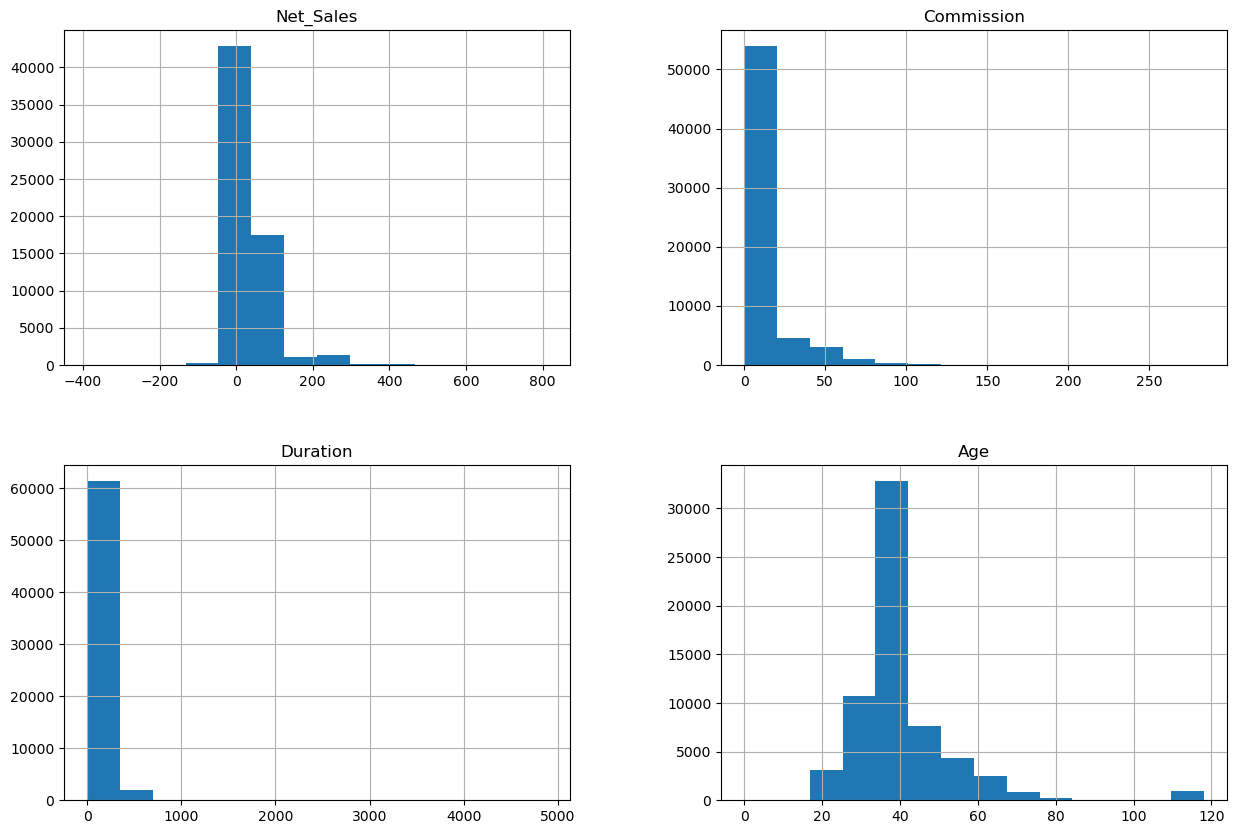

In [340]:
df[['Net_Sales', "Commission", "Duration", "Age"]].hist(bins=14, figsize=(15, 10));

### Boxplots to check for outliers

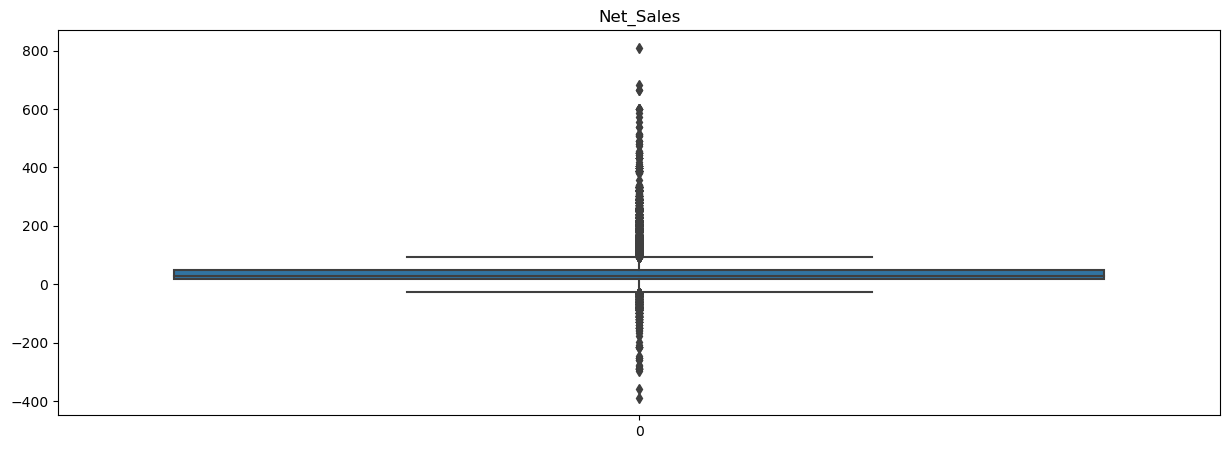

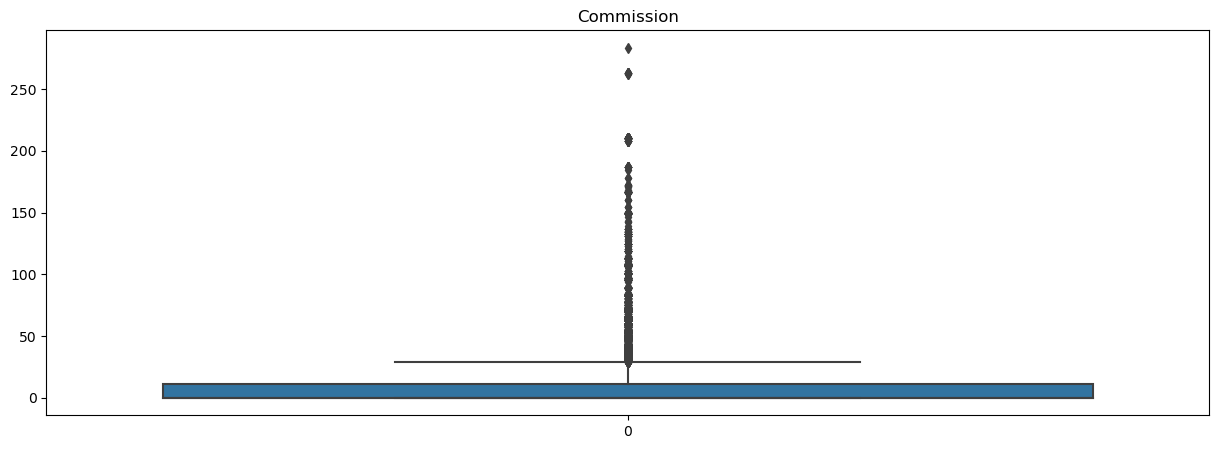

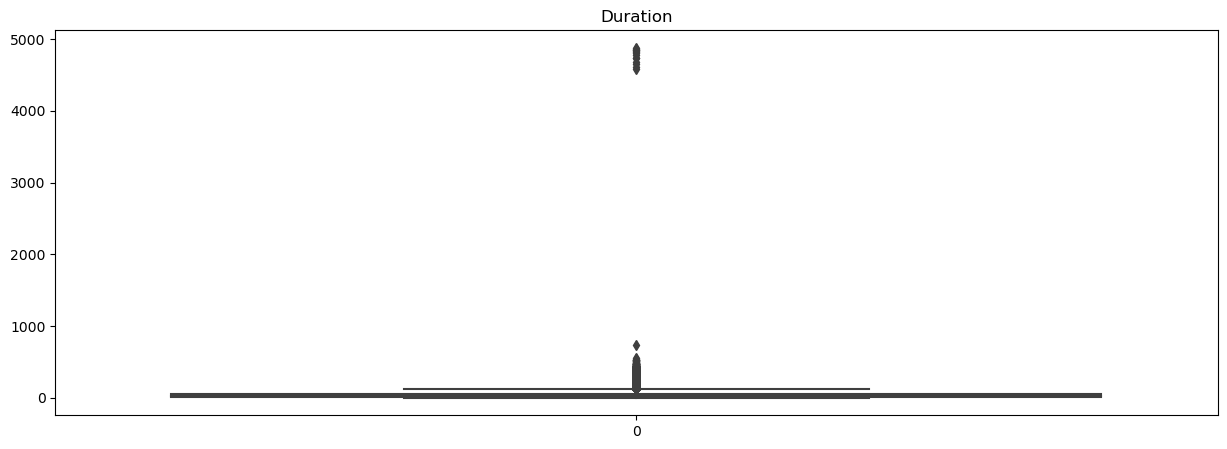

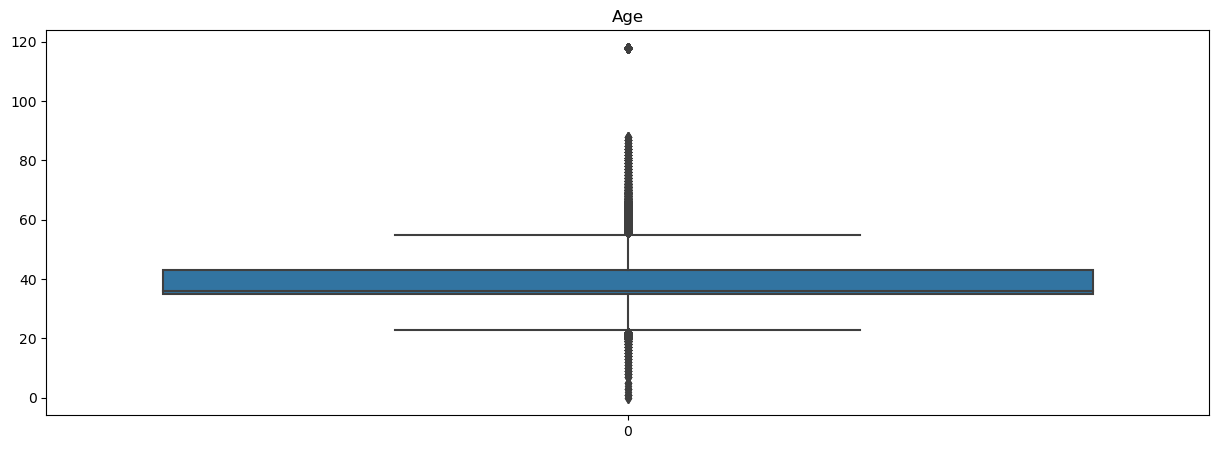

In [341]:
for i in numerical_features.columns:
    plt.figure(figsize=(15,5))
    plt.title(i)
    sns.boxplot(data=numerical_features[i])

### Checking correlations of numerical data with the claims data

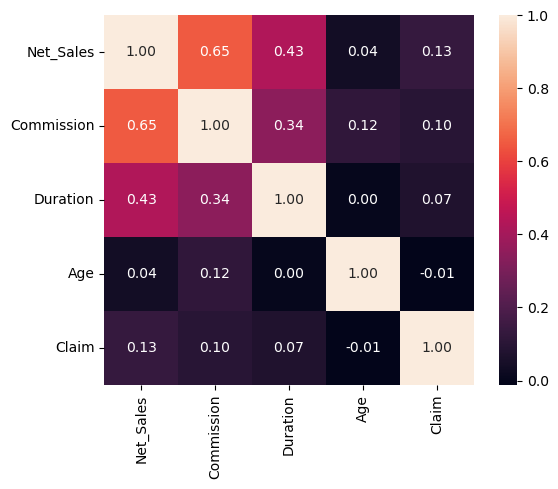

In [342]:
# Converting the claims column to 0 for No and 1 for Yes so I can conduct correlations with it

df_corr = df.copy()

df_corr['Claim'] = df_corr['Claim'].apply(
    lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))

numerical_feat_corr = df_corr[['Net_Sales', "Commission", "Duration", "Age", "Claim"]]

claim_corr = numerical_feat_corr.corr()

sns.heatmap(claim_corr, annot=True, fmt=".2f", square=True);

- The correlation ranges from -0.01 to 0.13, so there appears to be very little corrleation between numerical features and the target feature "Claim". It would appear that they may not be as helpful in predicting Claim status when being utilized as input features in the model.

## Analysis on Numerical Features

1) ### Net_Sales:  
    - It appears that the outliers are pretty evenly distributed as there are only a few that appear to be well above the rest,       but not by a significant margin. Out of the 4 numerical features, this had the highest correlation (0.13), although not by much. This shows there is some correlation between Net_Sales and Claim, although it is very small.    
</br>
</br>
    - Plan of Action: I believe that this field can be left alone as while there are some more significant outliers, they             aren't soo significant that I feel they negatively impact the data or appear to be so far out that they don't seem             legitimate.
</br>
</br>
2) ### Commission:    
    - There are a significant number of outliers that are fairly evenly distributed. There are a few that stand out more from         the rest. It appears that there are predominately 0 values in the dataset as indicated by the Descriptive Statistics. This also had the second highest correlation with Claim amongst numerical features (0.10). The correlation is pretty weak.
</br>
</br>
    - Plan of Action: Explore the significant outliers and determine if they need to be adjusted/removed.
</br>
</br>
3) ### Duration:
    - There are some pretty significant outliers in this field. Also, according to the Descriptive Statistics, there are some         negative values, which flight durations can't be less than 0, so those will need to be removed. There may also need to be       some manipulation of the significant outliers as the flight durations appear to be significantly longer than a typical         flight should take. Duration also had the second lowest correlation score amongst numerical features (0.07), which shows a very weak correlation.
</br>
</br>
    - Plan of Action: Adjust all negative values to positive, removing any rows that either have a 0 value or values greater                         than 1000.
</br>
</br>
4) ### Age:
    - This field appears to have a pretty normal distribution of data, with only one significant outlier in the individual that       is 118 years old. Age also had the lowest correlation score (-0.01), which means there is essentially no correlation at all between Age and Claim.
</br>
</br>    
    - Plan of Action: This piece of data is so far above the next closest outlier that I plan on removing it.

### Filtering the Duration column for extreme outliers or incorrect values

In [343]:
df_neg_outliers = df[(df['Duration'] <= 0) | (df['Duration'] >= 1000)]
df_neg_outliers

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commission,Age
911,RAB,Airlines,Online,Value Plan,No,0,BRUNEI DARUSSALAM,15.00,6.00,24
2515,JZI,Airlines,Online,Basic Plan,No,0,MYANMAR,18.00,6.30,26
2868,JZI,Airlines,Online,Basic Plan,No,0,INDONESIA,18.00,6.30,42
3025,SSI,Airlines,Online,Ticket Protector,No,4881,SINGAPORE,0.13,0.04,48
3282,RAB,Airlines,Online,Value Plan,No,0,BRUNEI DARUSSALAM,15.00,6.00,38
...,...,...,...,...,...,...,...,...,...,...
57114,RAB,Airlines,Online,Value Plan,No,0,BRUNEI DARUSSALAM,15.00,6.00,33
59528,JZI,Airlines,Online,Basic Plan,No,-1,CHINA,22.00,7.70,118
60746,SSI,Airlines,Online,Ticket Protector,No,0,SINGAPORE,4.88,1.37,48
63097,C2B,Airlines,Online,Bronze Plan,No,0,SINGAPORE,27.00,6.75,23


In [344]:
#This is converting any negative value to a positive value using the absolute value function

df['Duration'] = abs(df['Duration'])

#This is dropping all rows with a 0 duration and over 1000 duration
df = df.drop(df[df.Duration == 0].index)
df = df.drop(df[df.Duration >= 1000].index)

# This is verifying that the changes were applied correctly
df[(df['Duration'] <= 0) | (df['Duration'] >= 1000)]

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commission,Age


- The above shows that any rows that had a value of 0 or a value of 1000 or above were removed and that there are no longer values less than 0 in the Duration column.

### Exploring the Age column to remove the row with the value of 118

In [345]:
df = df.drop(df[df.Age == 118].index)
df[df['Age'] == 118]

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commission,Age


- The above shows that any rows demonstrates that the row with the age value of 118 was removed.

### Exploring the Commission column to assess the need to remove/adjust any values

In [346]:
# This is determining the value of the 90th percentile of the Commission column

print(f"The 90th percentile value for Commission is: {np.percentile(df['Commission'], 90)}")
print()
df_commission = df[df['Commission'] > np.percentile(df['Commission'], 90)]

df_commission

The 90th percentile value for Commission is: 29.7



,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commission,Age
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,44
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,37
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.0,49.40,48
16,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,48,DENMARK,-79.2,47.52,43
...,...,...,...,...,...,...,...,...,...,...
63237,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,MALAYSIA,79.2,47.52,39
63238,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,180,AUSTRALIA,79.2,47.52,31
63239,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,62,AUSTRALIA,99.0,59.40,54
63240,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,58,NEW ZEALAND,128.7,77.22,38


- Based on the data that was pulled, it appears that this information is legitimate, as there are still a significant amount of data points so I believe removing outliers from this data would create unnecessary information loss.

## Running EDA on Categorical Features

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62291 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                62291 non-null  object 
 1   Agency_Type           62291 non-null  object 
 2   Distribution_Channel  62291 non-null  object 
 3   Product_Name          62291 non-null  object 
 4   Claim                 62291 non-null  object 
 5   Duration              62291 non-null  int64  
 6   Destination           62291 non-null  object 
 7   Net_Sales             62291 non-null  float64
 8   Commission            62291 non-null  float64
 9   Age                   62291 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 5.2+ MB


In [348]:
categorical_features = df[['Agency', "Agency_Type", "Distribution_Channel", "Product_Name", "Destination"]] 

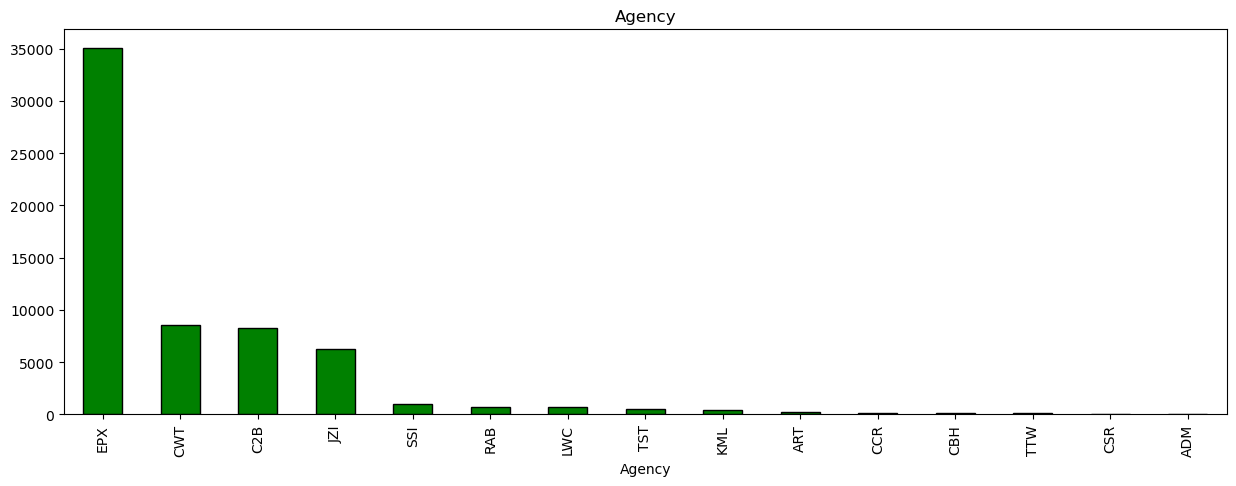

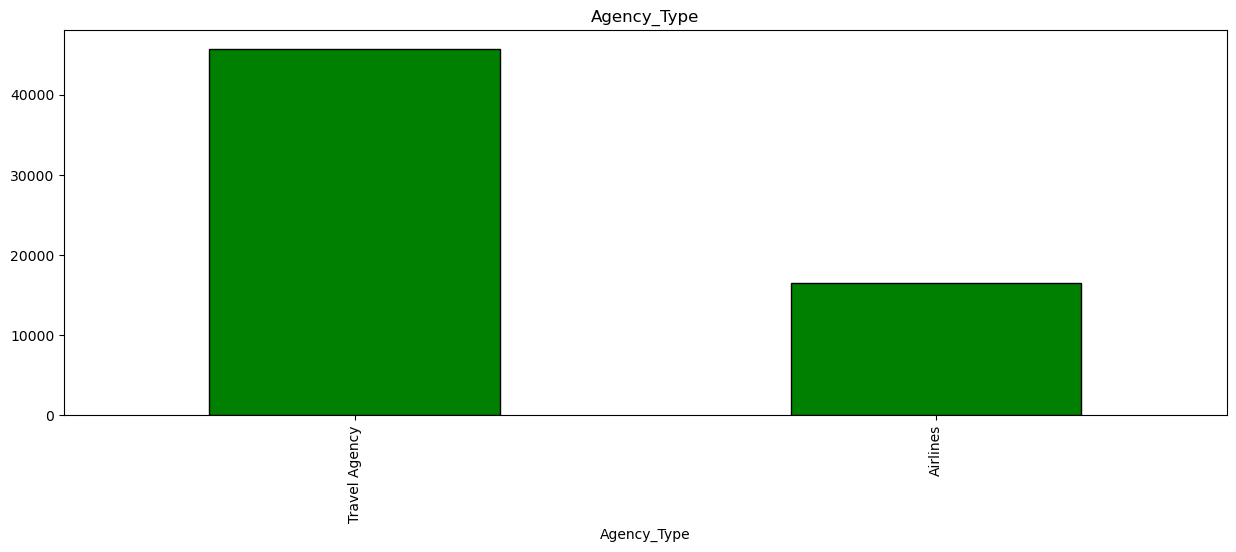

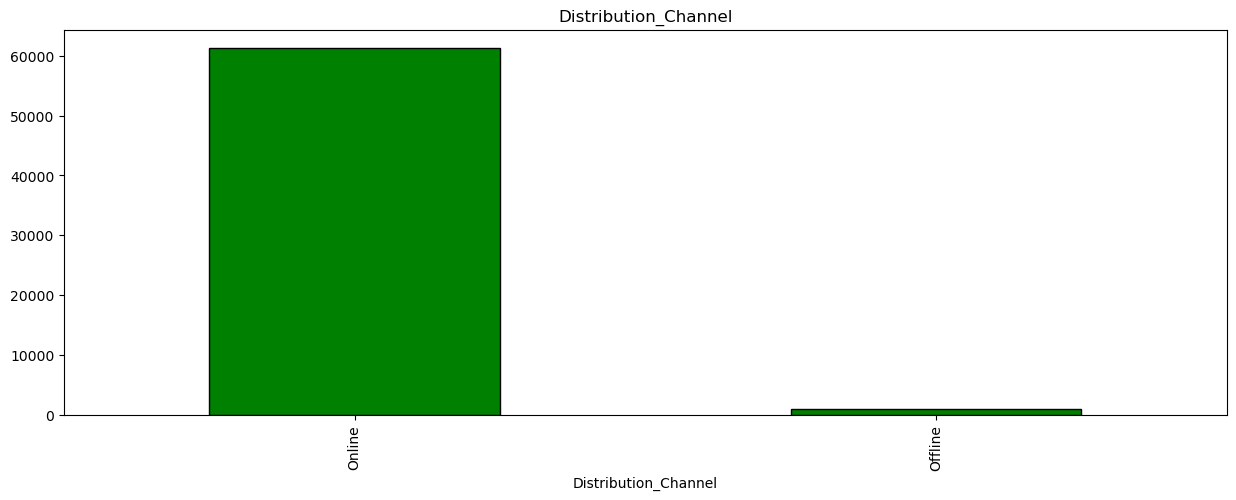

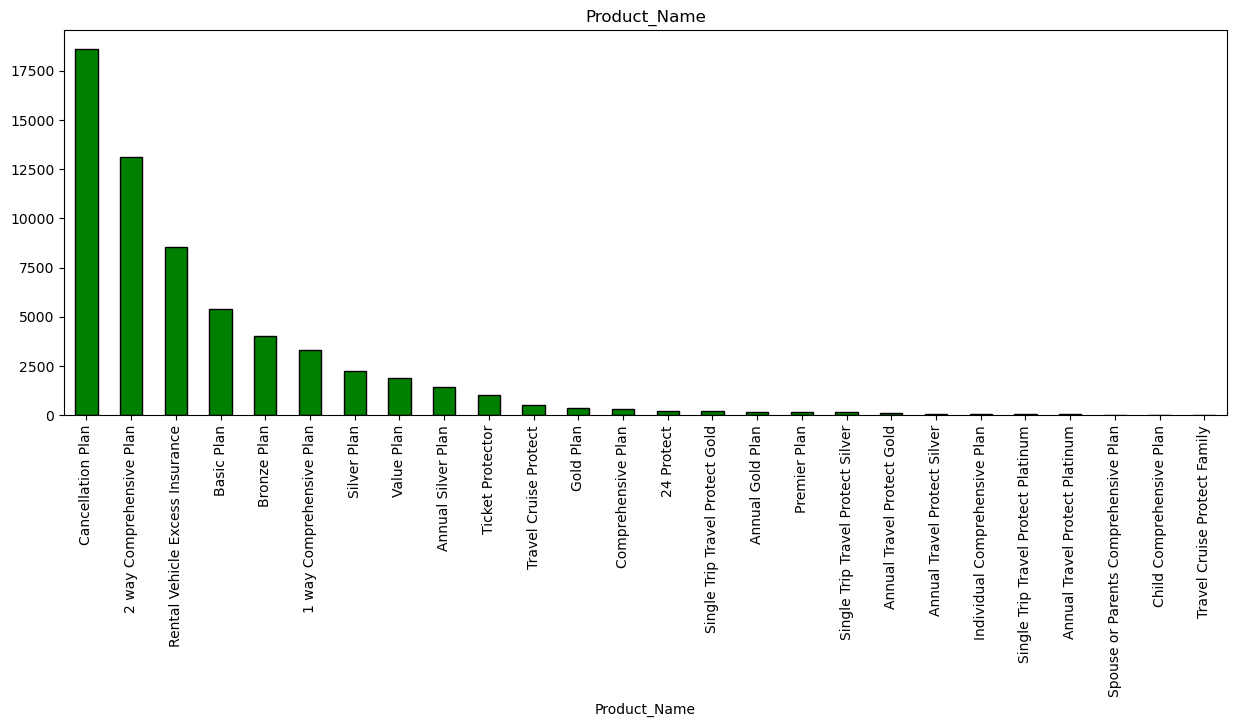

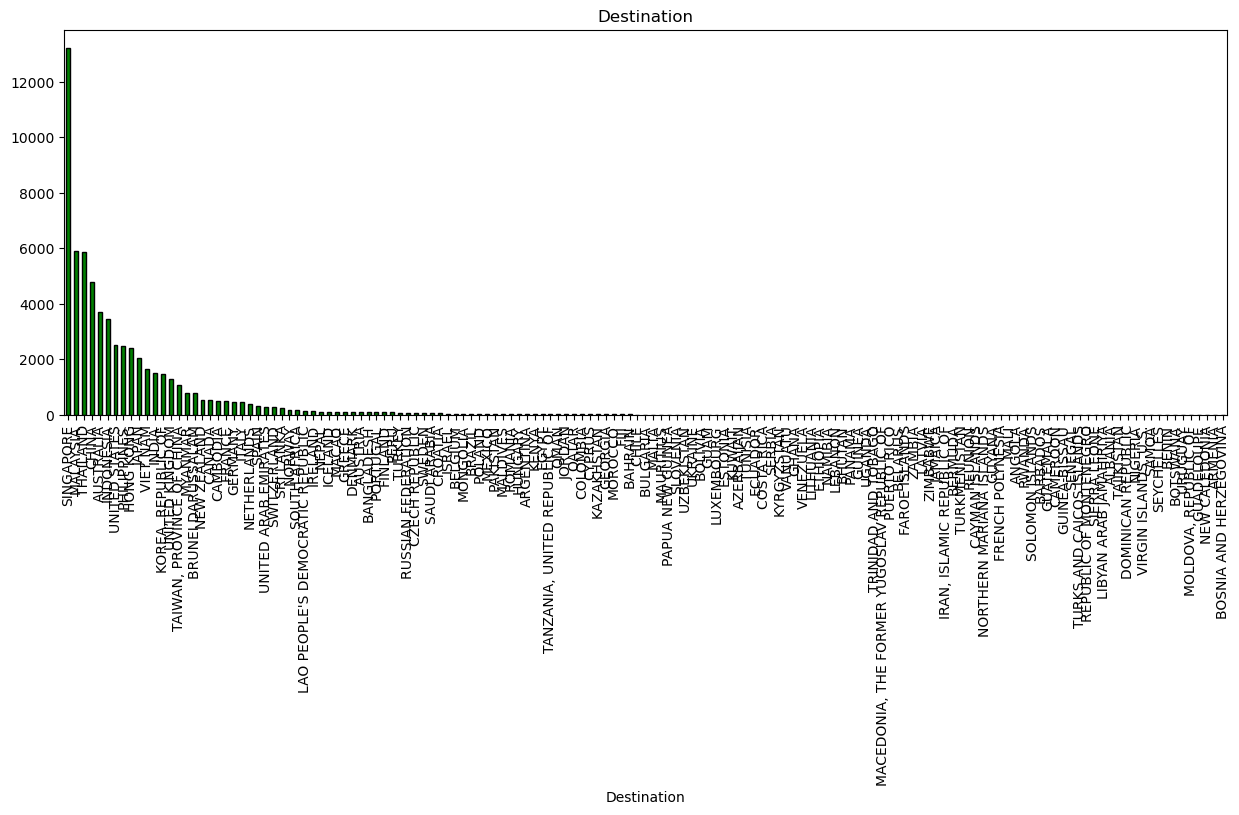

In [349]:
for i in categorical_features.columns:
    plt.figure(figsize=(15,5))
    plt.title(i)
    categorical_counts = df[i].value_counts()
    categorical_counts.plot(kind='bar', color='green', edgecolor='black')

In [350]:
# This is returning how many unique values are in each categorical column

for column in categorical_features.columns:
    print(f"The number of unique values in {column} column is: {len(df[column].unique())}")

The number of unique values in Agency column is: 15
The number of unique values in Agency_Type column is: 2
The number of unique values in Distribution_Channel column is: 2
The number of unique values in Product_Name column is: 26
The number of unique values in Destination column is: 147


## Analysis of Categorical Features

1) ### Agency:  
    - It appears EPX significantly outweights every other value in this column. There seems to be roughly even amount of values of CWT, C2B and JZI, and then there is another drop off and fairly even distribution of the remaining agencies.
</br>
</br>
    - Plan of Action: I think that I will need to do some grouping with this information. Considering there are a handful of values that dominate this category, it might be best to group the significantly lower represented agencies into an "Other" column, as encoding this could create an issue for the model as these appears to be a field that should use One-Hot Encoding. The reasoning is due to the fact there is no inherent order to this variable. I would also be afraid that it would contribute to overfitting of the data if there are too many new features created due to the One-Hot Encoding, so grouping makes sense to me.
</br>
</br>
2) ### Agency_Type:    
    - This is a binary feature and there does not appear to be anything significant to take from the bar chart other than travel agency is the much larger representative in this category.
</br>
</br>
    - Plan of Action: I plan on retaining the information in this category as I don't see any reason to make any adjustments to this category.
</br>
</br>
3) ### Distribution_Channel:
    - There is a significant discrepency in counts between online and offline. However, I think that, at the very least, it should be utilized in the initial model run as I don't want to discard it without seeing its impact on the model, especially before going through the tuning process.
</br>
</br>
    - Plan of Action: Leaving this alone (outside of encoding it) to utilize in the initial model run.
</br>
</br>
4) ### Product_Name:
    - There are a significant number of products in this list, many of which are a very small representation of the overall total in this column.
</br>
</br>    
    - Plan of Action: I am going to evaluate where the appropriate cutoff point is to group the smaller represented products into an "Other" category. Considering that this information will need to be One-Hot Encoded due to the fact that it is not ordinal or binary in nature. If I don't group the significantly smaller represented products into an "Other" category, that is 26 new features that will be created by the One-Hot Encoding and I don't want to have that many additional input features for my model. I am afraid if I use too many features, it will cause overfitting of the data and perform poorly on new, unseen data.
</br>
</br>
5) ### Destination:
    - This by far has the most unique values at 147. It would appear that there are a handful of destination that represent the bulk of this field (Singapore is dominating this category).
</br>
</br>
    - Plan of Action: I think this is an additional category that needs to be One-Hot Encoded due to the fact that it is not ordinal and it is not binary. Like Product_Name, I think that a significant number of these destinations need to be grouped into an "Other" category based on thresholds I will determine as I explore this field further. Having 147 new features created by One-Hot Encoding I think would be far too much for the model to take in and be able to return a reliable result. Like I stated in Product_Name, this would lead to severe overfitting in my opinion.

### Evaluating the Agency column

In [351]:
df.Agency.value_counts()/len(df.Agency)

Agency
EPX    0.563131
CWT    0.137676
C2B    0.132652
JZI    0.100384
SSI    0.016198
RAB    0.011559
LWC    0.011029
TST    0.008476
KML    0.006293
ART    0.004367
CCR    0.002360
CBH    0.001621
TTW    0.001573
CSR    0.001381
ADM    0.001300
Name: count, dtype: float64

- Based on this distribution, I am going to group all values that are less than 1% of the data. While I want to reduce the number of features that will be created by OHE (One-Hot Encoding), I don't want to lose too much data by removing too much information with grouping so the model still has sufficient information to learn from.

In [352]:
# Replacing any value that makes up less than 1% of the column values with "Other"
mask_agency = df.Agency.map(df.Agency.value_counts()/len(df.Agency)) < 0.01

df.Agency =  df.Agency.mask(mask_agency, 'OTHER')

In [353]:
df.Agency.value_counts()

Agency
EPX      35078
CWT       8576
C2B       8263
JZI       6253
OTHER     1705
SSI       1009
RAB        720
LWC        687
Name: count, dtype: int64

### Evaluating the Agency_Type column

In [354]:
df.Agency_Type.value_counts()/len(df.Agency_Type)

Agency_Type
Travel Agency    0.734841
Airlines         0.265159
Name: count, dtype: float64

- Based on this data, I don't think any other changes need to occur besides encoding this to prepare for model input.

### Evaluating the Distribution_Channel column

In [355]:
df.Distribution_Channel.value_counts()/len(df.Distribution_Channel)

Distribution_Channel
Online     0.983898
Offline    0.016102
Name: count, dtype: float64

- Like the Agency_Type column, I believe that the only thing that needs to be done is to encode it. Since there are only 2 unique values in this column, I don't want to remove anything as I fear information loss.

### Evaluating the Product_Name column

In [356]:
df.Product_Name.value_counts()/len(df.Product_Name)

Product_Name
Cancellation Plan                       0.299032
2 way Comprehensive Plan                0.210705
Rental Vehicle Excess Insurance         0.137676
Basic Plan                              0.086850
Bronze Plan                             0.064953
1 way Comprehensive Plan                0.053395
Silver Plan                             0.036089
Value Plan                              0.030309
Annual Silver Plan                      0.022844
Ticket Protector                        0.016198
Travel Cruise Protect                   0.008460
Gold Plan                               0.005651
Comprehensive Plan                      0.005105
24 Protect                              0.003933
Single Trip Travel Protect Gold         0.003243
Annual Gold Plan                        0.003114
Premier Plan                            0.003066
Single Trip Travel Protect Silver       0.002777
Annual Travel Protect Gold              0.001605
Annual Travel Protect Silver            0.001381
Individ

- Like the Agency column, I am going to reduce this to an "Other" name to replace any values that make up less than 1% of the data to ensure there are less features created.

In [357]:
mask_product = df.Product_Name.map(df.Product_Name.value_counts()/len(df.Product_Name)) < 0.01

df.Product_Name =  df.Product_Name.mask(mask_product, 'Other')

In [358]:
df.Product_Name.value_counts()

Product_Name
Cancellation Plan                  18627
2 way Comprehensive Plan           13125
Rental Vehicle Excess Insurance     8576
Basic Plan                          5410
Bronze Plan                         4046
1 way Comprehensive Plan            3326
Other                               2613
Silver Plan                         2248
Value Plan                          1888
Annual Silver Plan                  1423
Ticket Protector                    1009
Name: count, dtype: int64

### Evaluating the Destination column

In [359]:
df.Destination.value_counts()/len(df.Destination)

Destination
SINGAPORE                 0.211957
MALAYSIA                  0.094476
THAILAND                  0.093914
CHINA                     0.076592
AUSTRALIA                 0.059270
                            ...   
MOLDOVA, REPUBLIC OF      0.000016
GUADELOUPE                0.000016
NEW CALEDONIA             0.000016
ARMENIA                   0.000016
BOSNIA AND HERZEGOVINA    0.000016
Name: count, Length: 147, dtype: float64

- I am first going to remove all values that fall below 1% of the total value count of the column to see how many unique categories are left

In [360]:
mask_destination = df.Destination.map(df.Destination.value_counts()/len(df.Destination)) < 0.01

df.Destination =  df.Destination.mask(mask_destination, 'OTHER')

len(df.Destination.unique())

18

In [361]:
df.Destination.value_counts()

Destination
SINGAPORE                    13203
OTHER                         7399
MALAYSIA                      5885
THAILAND                      5850
CHINA                         4771
AUSTRALIA                     3692
INDONESIA                     3434
UNITED STATES                 2523
PHILIPPINES                   2481
HONG KONG                     2394
JAPAN                         2057
VIET NAM                      1667
INDIA                         1499
KOREA, REPUBLIC OF            1475
UNITED KINGDOM                1307
TAIWAN, PROVINCE OF CHINA     1083
MYANMAR                        797
BRUNEI DARUSSALAM              774
Name: count, dtype: int64

## Analysis after grouping

In [362]:
for column in categorical_features.columns:
    print(f"The number of unique values in {column} column is: {len(df[column].unique())}")

The number of unique values in Agency column is: 8
The number of unique values in Agency_Type column is: 2
The number of unique values in Distribution_Channel column is: 2
The number of unique values in Product_Name column is: 11
The number of unique values in Destination column is: 18


- After grouping a few of the categories and adding an "Other" value, we reduced the number of unique values from 192 to 41. While this still seems high to me, I am going to move forward with this to see how the model performs after Feature Engineering occurs. It is possible that more reduction may be needed, but I didn't want to reduce any farther in the event it creates too much of an issue with the model not being able to detect patterns due to too much information loss because of the grouping.

## Feature Engineering

- The various categorical features will need to be encoded. A variety of encoding options will be explored to determine which would be best to ensure the model is able to effectively use input features to predict our target.

### One-Hot Encoding

In [369]:
# Because all of the categorical variables have no inherent order and it doesn't appear that one should be valued more highly
# over another, I am going to One-Hot Encode these.

df_features = df.copy()

columns = ['Agency', "Agency_Type", "Distribution_Channel", "Product_Name", "Destination"]

df_features = pd.get_dummies(df_features, columns=columns, prefix=["Agn", "Agn_Type", "Dist_Chan", "Prd_Name", "Dest"], dtype=int)

df_features.head(10)

,Claim,Duration,Net_Sales,Commission,Age,Agn_C2B,Agn_CWT,Agn_EPX,Agn_JZI,Agn_LWC,...,Dest_MALAYSIA,Dest_MYANMAR,Dest_OTHER,Dest_PHILIPPINES,Dest_SINGAPORE,"Dest_TAIWAN, PROVINCE OF CHINA",Dest_THAILAND,Dest_UNITED KINGDOM,Dest_UNITED STATES,Dest_VIET NAM
0,No,186,-29.0,9.57,81,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,No,186,-29.0,9.57,71,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,No,65,-49.5,29.70,32,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,60,-39.6,23.76,32,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,79,-19.8,11.88,41,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,No,66,-121.0,42.35,44,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,No,47,-39.6,23.76,32,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,No,63,-108.9,65.34,29,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,No,57,-19.8,11.88,44,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,No,186,-99.0,59.40,37,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [374]:
# I am going to LabelEncode the target variable so 0s apply to the "No" and 1s apply to "Yes".

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_features['Claim'] = le.fit_transform(df_features['Claim'])

df_features.head(10)

,Claim,Duration,Net_Sales,Commission,Age,Agn_C2B,Agn_CWT,Agn_EPX,Agn_JZI,Agn_LWC,...,Dest_MALAYSIA,Dest_MYANMAR,Dest_OTHER,Dest_PHILIPPINES,Dest_SINGAPORE,"Dest_TAIWAN, PROVINCE OF CHINA",Dest_THAILAND,Dest_UNITED KINGDOM,Dest_UNITED STATES,Dest_VIET NAM
0,0,186,-29.0,9.57,81,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,186,-29.0,9.57,71,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,65,-49.5,29.70,32,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,60,-39.6,23.76,32,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,79,-19.8,11.88,41,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,66,-121.0,42.35,44,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,0,47,-39.6,23.76,32,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,63,-108.9,65.34,29,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,57,-19.8,11.88,44,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,186,-99.0,59.40,37,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- There are now 45 possible features, to go along with the 1 target variable. I am going to proceed forward and see how well the model performs with this number of features. I will also be assessing for feature importance after running the model initially to see if input features can/should be reduced on subsequent iterations of the model.

## Model Prep

- Model Choice: I am going with a Random Forest Classifier as it can predict a binary classification target. In addition, decision tree models work well with an imbalanced dataset, and considering the disproportionate amount of "No" claims to "Yes" claims, I believe Random Forest is best suited for this dataset. 

In [472]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [485]:
# Splitting the data into features and target variable
X = df_features.drop('Claim', axis=1)
y = df_features['Claim']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Note:

- Scaling was not conducted on the numerical data as tree based models do not require this to be done for the input features. The reason for this is that RandomForest is not a distance based model, unlike a KNN (K Nearest Neighbors) model, so scaling does not need to be conducted for RandomForest to be effective. More can be referenced here:
</br>
</br>
##### Reference:
Arya, N. (2022, July 25). KDnuggets. Does the Random Forest Algorithm need Normalization?
    https://www.kdnuggets.com/2022/07/random-forest-algorithm-need-normalization.html

## RandomForestClassifier Model

In [498]:
# Creating an instance of the RandomForestClassifer with default hyperparameters

rf_classifier = RandomForestClassifier()

In [487]:
#Fitting the model to the training data and then using the trained model to predict the target variable with the test data

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

## Calculating Metrics of the Model's Performance

 - ### Confusion Matrix

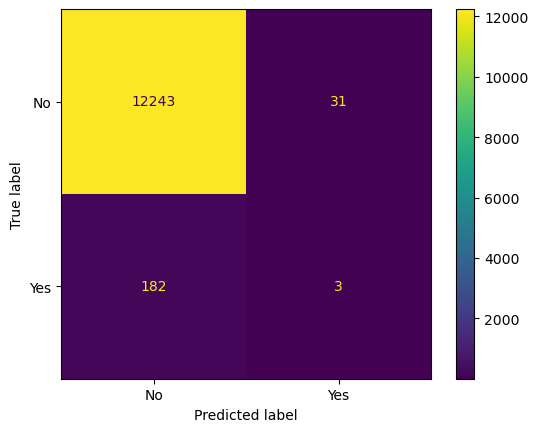

In [488]:
# Creating a confusion matrix off of the test data and the predicted data and plotting the results

cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cnf_matrix, display_labels=("No", "Yes")).plot();

- ### Classification Report

In [489]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred).round(4)}")
print(f"Precision Score: {precision_score(y_test, y_pred).round(4)}")
print(f"Recall Score: {recall_score(y_test, y_pred).round(4)}")
print(f"F1 Score: {f1_score(y_test, y_pred).round(4)}")

              precision    recall  f1-score   support

          No       0.99      1.00      0.99     12274
         Yes       0.09      0.02      0.03       185

    accuracy                           0.98     12459
   macro avg       0.54      0.51      0.51     12459
weighted avg       0.97      0.98      0.98     12459


Accuracy Score: 0.9829
Precision Score: 0.0882
Recall Score: 0.0162
F1 Score: 0.0274


- While the model performs great on predicting the "No" claims and the overall accuracy of the model is very high, the model struggled significantly to predict the "Yes" claims, based on the very low precision (how many yes predictions did the model make that were actually yes), recall (how many yes cases that the model correctly predicted) and f1 (combination of precision and recall) scores.
</br>
</br>
- The confusion matrix demonstrates that the model only made 3 correct Yes predictions out of 185, while it more significantly predicted No when the true value was Yes. With how imbalanced target classes are, it is not surprising that it struggled as it did on the first iteration. The next step I want to try is to tune the model hyperparameters and see how that impacts the model performance. 

In [450]:
# Setting up grid parameters to feed into GridSearchCV to determine the best combination of hyper parameters to use on these
# features.

grid_parameters={'max_depth':[3,5,10,None],
                 'n_estimators':[10,100,200],
                 'max_features':[1,3,5,7],
                 'min_samples_leaf':[1,2,3],
                 'min_samples_split':[1,2,3]
}

In [451]:
grid = GridSearchCV(rf_classifier, param_grid = grid_parameters, cv=3, scoring = 'accuracy')
model_grid = grid.fit(X_train, y_train)

C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\meierd\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_

In [490]:
# This is assigning variables to the best parameters, the best estimator (model)

rf_best_params = model_grid.best_params_
rf_best_estim = model_grid.best_estimator_
rf_feat_importance = rf_best_estim.feature_importances_
rf_average_score = "{:.3}".format(model_grid.best_score_)
print(f"Best hyperparameters: {rf_best_params}")
print(f'Mean Accuracy: {rf_average_score}')

# This is creating a dataframe that has all of the feature columns and their ranking of importance

feat_imp_col_names = X.columns

feature_imp_df = pd.DataFrame(rf_feat_importance, index=feat_imp_col_names, columns=["Importance"])
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
feature_imp_df

Best hyperparameters: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
Mean Accuracy: 0.985


,Importance
Duration,0.342320
Age,0.277420
Net_Sales,0.180017
Commission,0.117483
Agn_C2B,0.016016
Dest_SINGAPORE,0.007675
Prd_Name_Annual Silver Plan,0.006707
Prd_Name_Bronze Plan,0.004425
Agn_Type_Travel Agency,0.004143
Agn_Type_Airlines,0.004034


### Assessment on Grid Search Results

- There is quite the diversity in how important each feature is outside of the top 4 features (Duration, Age, Net_Sales and Commission. Interestingly enough, these are all numerical features, especially with their correlation coefficients all being very close to 0. However, tree models have more of a tendency to overestimate the importance of numerical features. See more on this below:
</br>
</br>
##### Reference:
- Soleymani, A. (2022, Feb 25). Medium. Stop using random forest feature importances. Take this intuitive approach instead. https://www.medium.com/@ali.soleymani.co/stop-using-random-forest-feature-importances-take-this-intuitive-approach-instead-4335205b933f
</br>
</br>
- Next step will be to apply the returned best hyperparameters to the features used in the first iteration to see how those impact the model performance. I would like to do this before potentially removing any features from our model input.

## Second Iteration of Random Forest with Tuned Hyperparameters

In [491]:
# This is using the best estimator that was generated from GridSearchCV and applying it to the test data to make predictions

y_pred = rf_best_estim.predict(X_test)

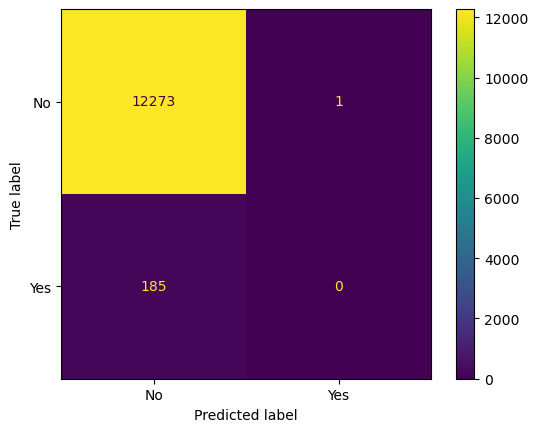

In [492]:
cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cnf_matrix, display_labels=("No", "Yes")).plot();

In [493]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred).round(4)}")
print(f"Precision Score: {precision_score(y_test, y_pred).round(4)}")
print(f"Recall Score: {recall_score(y_test, y_pred).round(4)}")
print(f"F1 Score: {f1_score(y_test, y_pred).round(4)}")

              precision    recall  f1-score   support

          No       0.99      1.00      0.99     12274
         Yes       0.00      0.00      0.00       185

    accuracy                           0.99     12459
   macro avg       0.49      0.50      0.50     12459
weighted avg       0.97      0.99      0.98     12459


Accuracy Score: 0.9851
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


- Interestingly the overall accuracy of the model improved, however the Precision, Recall and F1 scores for the True Positive predictions were 0 as they did not predict a single positive value correctly. My belief is because there is soo little "Yes" claim data, that the model was able to tune well to the "No" data and wasn't able to properly tune for the "Yes" data. One thing I am going to try next is to oversample the "Yes" class and see how that impacts the model, making both the "No" and "Yes" classes equally represented in the data.

## Third Iteration of Random Forest Model (Balancing Class Weight)

In [494]:
rf_classifier = RandomForestClassifier(class_weight = "balanced", max_depth = None, max_features = 3, min_samples_leaf = 2, 
                                       min_samples_split = 3, n_estimators = 20)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=3,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=20)

In [495]:
y_pred = rf_classifier.predict(X_test)

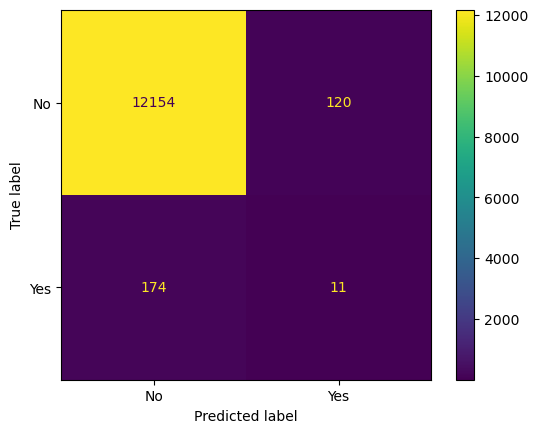

In [496]:
cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cnf_matrix, display_labels=("No", "Yes")).plot();

In [497]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred).round(4)}")
print(f"Precision Score: {precision_score(y_test, y_pred).round(4)}")
print(f"Recall Score: {recall_score(y_test, y_pred).round(4)}")
print(f"F1 Score: {f1_score(y_test, y_pred).round(4)}")

              precision    recall  f1-score   support

          No       0.99      0.99      0.99     12274
         Yes       0.08      0.06      0.07       185

    accuracy                           0.98     12459
   macro avg       0.53      0.52      0.53     12459
weighted avg       0.97      0.98      0.97     12459


Accuracy Score: 0.9764
Precision Score: 0.084
Recall Score: 0.0595
F1 Score: 0.0696


## Final Evaluation

- Balancing the class weight along with the tuned hyperparameters using all features lowered the overall Accuracy and Precision from the initial model slightly, but improved the Recall and F1 Score slightly. It appears that the model is still struggling to properly predict Yes when the actual value is Yes, along with predicting too many No's when they should be Yes.
</br>
</br>
- One possible method to incorporate going forward would be to oversample the minority class (Yes). Another possible avenue would be to adjust the features provided to the model based on feature importance metrics that were gathered previously. During this assignment, I did not adjust the features as I wanted to see how hypertuning the model impacted the predictive power, along with adjusting class weights while utilizing all of the features. Considering I cut the number of possible features down other due to grouping multiple categorical variables with an "Other" value, I wanted to assess how this model would perform with all of them.
</br>
</br>
- Another option would be to revisit the EDA phase and adjust the thresholds for when to place data into an "Other" category. There were a significant number of values removed from three different categories (Agency, Product_Type, and Destination) that potentially caused the model to have a harder time detecting patterns with regards to the minority class. It is possible that giving the model additional information in this regard could improve the performance metrics of the model.
</br>
</br>
- If possible, it would be ideal to collect more natural data on "Yes" claims. While random oversampling is an option along with adjusting input features, having more data regarding the minority class would be the best starting point, in my opinion.